![title](https://igws.indiana.edu/images/IGWS_Logo.svg)
# Macrostrat - 03 Process Points - Indiana Historic Epicenters
## [Kevin Russell, GISP](https://igws.indiana.edu/staff.cfm?user=kevrusse)

This workflow guides the user to 
<ol>1. select a directory containing their source data, a results directory, and the shapefile to be processed.</ol>
<ol>2. Data is imported to a geopandas dataframe and populates an array of column values.</ol>
<ol>3. The user then maps the source fields to macrostrat fields.</ol>
<ol>4. Write out to new file.</ol>


In [1]:
import os
import contextily as ctx
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona
%matplotlib inline
import tkinter as tk #python3 import
from tkinter import ttk
from tkinter.filedialog import askopenfilename
from tkinter.filedialog import askdirectory
from tkinter.filedialog import asksaveasfilename
from pathlib import Path

In [17]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/toner-lite/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

In [114]:
tk.Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
source_loc = askdirectory(title='Where is the FOLDER containing your map data?')
source_path = Path(source_loc)

try:
    files = [file for file in source_path.iterdir() if file.suffix == '.shp']
    for file in files:
        print(file)
    print('{} files in total.'.format(len(files)))

except:
    print('Could not open the directory.')
finally:
    print('\nYour data is at: {}\n'.format(source_path))

results_loc = askdirectory(title='Where should I save the results (GEODATABASE)?')
results_path = Path(results_loc)

print('Saving data to: {}\n'.format(results_path))

file_types = [('shape files', '.shp'), ('all files', '.*') ]
#source_loc = r'\\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap'
source_file = askopenfilename(title='Select the file to process.', initialdir=os.path.abspath(source_path), defaultextension = '.shp', filetypes = file_types)

dataframe = gpd.read_file(source_file)
source_columns = dataframe.columns.values
dataframe.head(n=10)

\\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap\Bedrock_Geology_RGM_250K_IN.shp
\\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap\Bedrock_Surface_250k_IGS_IN.shp
\\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap\Earthquake_Epicenters_IN.shp
\\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap\Petroleum_Fields_IGS_IN.shp
\\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap\structural_features_in.shp
\\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap\structural_features_inCopy.shp
6 files in total.

Your data is at: \\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap

Saving data to: \\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap



,OBJECTID,TID,yr,mo,dy,hr,mn,sec,lat,lon,dep,erh,EM,Efac,SM,Mag,MapNumber,geometry
0,1,TMP03742,1922.0,1.0,11.0,3.0,42.0,0.0,37.900,-87.800,0.0,20.0,3.75,1.090,0.190,3.75,25,POINT (429666.3011830313 4195021.545128376)
1,2,TMP03910,1925.0,9.0,2.0,11.0,55.0,0.0,37.900,-87.200,0.0,22.0,4.40,1.057,0.152,4.40,26,POINT (482416.708074072 4194738.758198197)
2,3,TMP25987,2000.0,12.0,7.0,14.0,8.0,49.4,37.973,-87.660,5.0,6.0,3.75,1.047,0.139,3.75,38,POINT (442032.210037025 4203024.752962475)
3,4,TMP01704,1886.0,8.0,12.0,22.0,0.0,0.0,37.984,-87.543,0.0,34.0,4.30,1.886,0.515,4.30,7,POINT (452315.5198440138 4204178.854158047)
4,5,TMP29479,2002.0,6.0,18.0,17.0,37.0,15.1,37.987,-87.780,5.0,2.0,4.48,1.024,0.100,4.48,40,POINT (431505.4786095292 4204659.6093324)
5,6,TMP00725,1827.0,8.0,7.0,4.0,30.0,0.0,38.000,-88.000,0.0,30.0,3.31,1.872,0.512,3.31,2,POINT (412201.5821645801 4206286.75794106)
6,7,TMP00724,1827.0,7.0,5.0,11.0,30.0,0.0,38.000,-87.500,0.0,34.0,4.64,1.092,0.192,4.64,3,POINT (456101.199737556 4205932.948189504)
7,8,TMP17636,1990.0,1.0,24.0,18.0,20.0,24.4,38.133,-86.434,5.0,1.0,3.92,1.049,0.141,3.92,35,POINT (549603.5994199015 4220723.104966213)
8,9,TMP02677,1893.0,12.0,14.0,17.0,10.0,0.0,38.150,-87.650,0.0,38.0,3.44,1.108,0.207,3.44,11,POINT (443047.8814381149 4222657.604875602)
9,10,TMP03278,1906.0,9.0,7.0,16.0,33.0,0.0,38.200,-87.700,0.0,20.0,3.07,1.125,0.222,3.07,17,POINT (438708.7934998546 4228237.356703686)


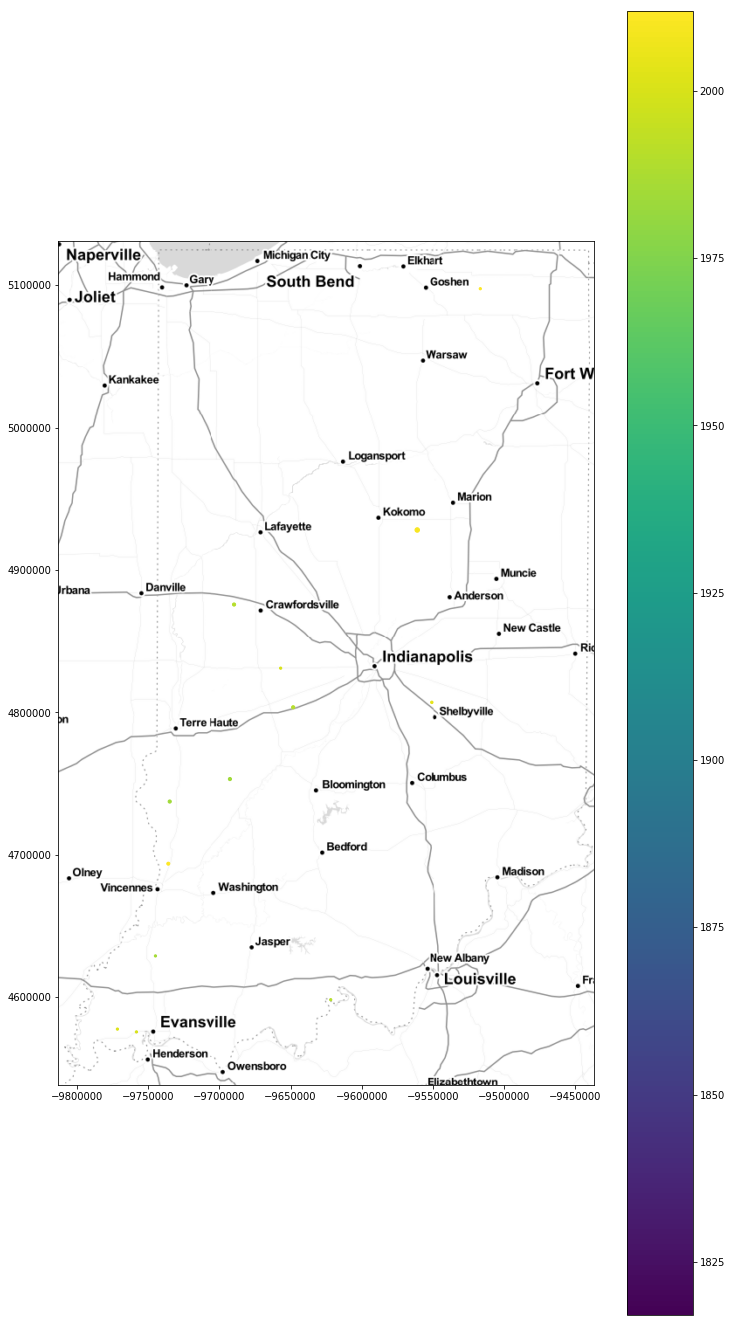

In [109]:
# plot data on a web map
dataframe = dataframe.to_crs(epsg=3857)
display_field = input("What is the name of field to symbolize by COLOR on the map?")
marker_size = input("What is the name of the field to symbolize by SIZE on the map?")

ax = dataframe.plot(figsize=(12,24), legend = True, column=display_field, markersize=marker_size)
add_basemap(ax, zoom=8)

In [86]:
macro_columns = ['point_type', 'certainty', 'comments', 'strike', 'dip', 'dip_dir']
print("Here is a list of columnns in the source data.{}".format(source_columns))
#igws_columns = input("Provide a list of IGWS fields to add.").strip().split(',')

Here is a list of columnns in the source data.['OBJECTID' 'TID' 'yr' 'mo' 'dy' 'hr' 'mn' 'sec' 'lat' 'lon' 'dep' 'erh'
 'EM' 'Efac' 'SM' 'Mag' 'MapNumber' 'geometry']


In [154]:
dataframe = dataframe.rename(columns={'yr':'year', 'mo':'month', 'dy':'day', 'hr':'hour', 'mn':'minute', 'sec':'second'})
dataframe['date'] = pd.to_datetime(date_df, unit='s')
dataframe = dataframe.drop(['year', 'month', 'day', 'hour', 'minute', 'second'], axis=1)
dataframe.head()

AttributeError: module 'geopandas' has no attribute 'to_datetime'

In [150]:
drop_fields = input('Provide a list of fields [separated by a space] to remove')
drop_fields = drop_fields.split()
dataframe = dataframe.drop(drop_fields, axis=1)
dataframe.head()

,lat,lon,dep,erh,Mag,geometry,date,comments
0,37.900,-87.800,0.0,20.0,3.75,POINT (429666.3011830313 4195021.545128376),1922-01-11 03:42:00.000,"Date: 1922-01-11 03:42:00.000, Magnitude: 3.75..."
1,37.900,-87.200,0.0,22.0,4.40,POINT (482416.708074072 4194738.758198197),1925-09-02 11:55:00.000,"Date: 1925-09-02 11:55:00.000, Magnitude: 4.4,..."
2,37.973,-87.660,5.0,6.0,3.75,POINT (442032.210037025 4203024.752962475),2000-12-07 14:08:49.400,"Date: 2000-12-07 14:08:49.400, Magnitude: 3.75..."
3,37.984,-87.543,0.0,34.0,4.30,POINT (452315.5198440138 4204178.854158047),1886-08-12 22:00:00.000,"Date: 1886-08-12 22:00:00.000, Magnitude: 4.3,..."
4,37.987,-87.780,5.0,2.0,4.48,POINT (431505.4786095292 4204659.6093324),2002-06-18 17:37:15.100,"Date: 2002-06-18 17:37:15.100, Magnitude: 4.48..."


In [151]:
dataframe['comments'] = 'Date: ' + dataframe['date'].astype(str) + ', Magnitude: ' + dataframe['Mag'].astype(str) + ', Depth (km below): ' + dataframe['dep'].astype(str) + ', Estimated Horizontal Accuracy (km): ' + dataframe['erh'].astype(str) 
dataframe = dataframe[['date', 'lat', 'lon', 'Mag', 'dep', 'erh', 'comments', 'geometry']]
dataframe.head()

,date,lat,lon,Mag,dep,erh,comments,geometry
0,1922-01-11 03:42:00.000,37.900,-87.800,3.75,0.0,20.0,"Date: 1922-01-11 03:42:00.000, Magnitude: 3.75...",POINT (429666.3011830313 4195021.545128376)
1,1925-09-02 11:55:00.000,37.900,-87.200,4.40,0.0,22.0,"Date: 1925-09-02 11:55:00.000, Magnitude: 4.4,...",POINT (482416.708074072 4194738.758198197)
2,2000-12-07 14:08:49.400,37.973,-87.660,3.75,5.0,6.0,"Date: 2000-12-07 14:08:49.400, Magnitude: 3.75...",POINT (442032.210037025 4203024.752962475)
3,1886-08-12 22:00:00.000,37.984,-87.543,4.30,0.0,34.0,"Date: 1886-08-12 22:00:00.000, Magnitude: 4.3,...",POINT (452315.5198440138 4204178.854158047)
4,2002-06-18 17:37:15.100,37.987,-87.780,4.48,5.0,2.0,"Date: 2002-06-18 17:37:15.100, Magnitude: 4.48...",POINT (431505.4786095292 4204659.6093324)


In [152]:
macro_df = dataframe.assign(point_type = 'epicenter', certainty = dataframe['erh'])                         
macro_df.head()

,date,lat,lon,Mag,dep,erh,comments,geometry,point_type,certainty
0,1922-01-11 03:42:00.000,37.900,-87.800,3.75,0.0,20.0,"Date: 1922-01-11 03:42:00.000, Magnitude: 3.75...",POINT (429666.3011830313 4195021.545128376),epicenter,20.0
1,1925-09-02 11:55:00.000,37.900,-87.200,4.40,0.0,22.0,"Date: 1925-09-02 11:55:00.000, Magnitude: 4.4,...",POINT (482416.708074072 4194738.758198197),epicenter,22.0
2,2000-12-07 14:08:49.400,37.973,-87.660,3.75,5.0,6.0,"Date: 2000-12-07 14:08:49.400, Magnitude: 3.75...",POINT (442032.210037025 4203024.752962475),epicenter,6.0
3,1886-08-12 22:00:00.000,37.984,-87.543,4.30,0.0,34.0,"Date: 1886-08-12 22:00:00.000, Magnitude: 4.3,...",POINT (452315.5198440138 4204178.854158047),epicenter,34.0
4,2002-06-18 17:37:15.100,37.987,-87.780,4.48,5.0,2.0,"Date: 2002-06-18 17:37:15.100, Magnitude: 4.48...",POINT (431505.4786095292 4204659.6093324),epicenter,2.0


In [155]:
macro_df['date'] = macro_df['date'].astype(str)

In [156]:
macro_df.to_file(r'\\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap\IN_Historic_Epicenters')